# Компьютерные игры в интернет магазине. 
Определение закономерностей определяющих успех продаж компьютерных игры в интернет магазине и планирование рекламных компаний.  

В нашем распоряжении данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и названия платформ в период с 1980 по 2016 год.

Краткий план действий:
- 1) Анализ данных с целью выявления пропусков, дубликатов, аномальных значений.
- 2) Предобработка данных.Замена пропусков там где это уместно.Приведение данных к необходимому типу данных и т.д. 
- 3) Исследовательский анализ - построение графиков, диаграмм рассеяния, нахождение зависимостей.
- 4) Проверка гипотез.
- 5) Общий вывод.


### 1)  Анализ данных с целью выявления пропусков, дубликатов, аномальных значений.

In [1]:
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

In [2]:
df_games = pd.read_csv('/datasets/games.csv') 
display(df_games)
df_games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df_games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [4]:
df_games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [5]:
df_games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

#### Вывод
При первом анализе данных можно выделить наличие пропусков в столбцах со значениями рейтинга, оценками пользователей и критиков, а так же в столбце с указанием года реализации.Можно предположить что причиной их наличия является некачественная выгрузка данных.Еще причиной появления пропусков может быть отсутствие достаточного количества данных для того чтобы поставить объективную оценку и поставить нужный рейтинг. 
А так же к "проблемам" в таблице можно отнести несоответствие типа данных в столбце 'user_score'.Так же хотелось бы отметить, что названия столбцов необходимо привести к нижнему регистру.Еще необходимо проверить данные на наличие дубликатов. 

### 2) Предобработка данных.Замена пропусков там где это уместно.Приведение данных к необходимому типу данных и т.д.

Приведем названия столбцов к нижнему регистру

In [6]:
df_games.columns = df_games.columns.str.lower()

Проверим наши данные на наличие дубликатов

In [7]:
df_games.duplicated().sum()

0

Удалим пропуски в столбцах 'year_of_release','name', так как количество пропусков не значительное.

In [8]:
df_games.dropna(subset = ['year_of_release','name'], inplace = True)

df_games['year_of_release'] = df_games['year_of_release'].astype(int)

In [9]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Приведем столбец 'year_of_release' к нужному нам типу данных

In [10]:
df_games.dropna(subset = ['year_of_release','name'], inplace = True)
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

После проверки уникальных значений в столбцах с оценками и рейтингом мы обнаружили значение 'tbd' в столбце 'user_score'.
Его значение расшифровывается дословно так - To Be Determined, то есть "Будет определено".То есть это значение можно приравнять к значению 'NaN'.Для дальнейшей работы мы можем заменить это значение на '-1', чтобы не путаться и его было легче найти.А так же чтобы перевести данные к типу float.
Так же я пришел к решению не заменять пропуска в столбцах с оценками и рейтингом, так как эти показатели относятся к категории субъективных.И замена пропусков в данных столбцах на среднее значение и медиану может дать нам нерелевантный результат.

In [11]:
def tbd_1(x):
    if x == 'tbd':
        return '-1'
    else:
        return x
df_games['user_score'] = df_games['user_score'].apply(tbd_1)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Приведем данные столбца 'user_score к числовому типу данных float.

In [12]:
def user_score_float(row):
    score = row['user_score']
    if score == 'nan':
        return score
    else:
        return float(score)
df_games['user_score'] = df_games.apply(user_score_float, axis = 1)

In [13]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Добавим столбец с мировыми продажами.

In [14]:
def total_sales(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales']+row['other_sales']
df_games['total_sales'] = df_games.apply(total_sales, axis = 1) 
df_games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


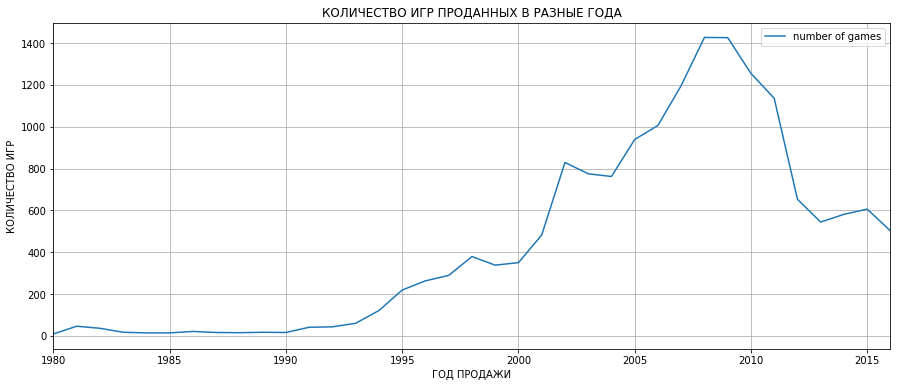

In [15]:
games_by_year = df_games.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count')
games_by_year.reset_index()
legend = ['number of games']
games_by_year.plot(grid = True, legend = True, alpha = 1, figsize= (15, 6), label = True)
plt.ylabel('КОЛИЧЕСТВО ИГР')
plt.xlabel('ГОД ПРОДАЖИ')
plt.legend(legend)
plt.title('КОЛИЧЕСТВО ИГР ПРОДАННЫХ В РАЗНЫЕ ГОДА');

#### Вывод

Как мы видим продажи компьютерных игр существенно начали расти в начале 2000-х.И достигли своего первого пика в период с 2008 г. по 2009 г.Думаю это напрямую связанно с развитием технологий необходимых для производства игр.

Попробуем выявить средний период актуальности одной платформы.Это поможет нам найти актуальные тенденции в сфере компьютерных игр.  

Определим список платформ с самыми высокими общими выручками за все периоды.

In [16]:
platform_total_sales = df_games.pivot_table(index='platform', values ='total_sales', aggfunc = 'sum')
platform_total_sales = platform_total_sales.reset_index()
platform_total_sales.sort_values(by = 'total_sales', ascending = False)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Оставим названия платформ, у которых общий суммарный доход больше 100 млн.В нашем списке их 18.

In [17]:
top_platforms_by_sales = platform_total_sales.sort_values(by ='total_sales', ascending = False).head(18)
top_platforms_by_sales

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Создадим список с названиями наших платформ (18)

In [18]:
top_platforms_by_sales_list = list(top_platforms_by_sales['platform'])
top_platforms_by_sales_list

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'PC',
 'GB',
 'XB',
 'NES',
 'N64',
 'SNES',
 'GC',
 'XOne']

Создадим срез данных в котором будут указаны только наши отобранные названия платформ.

In [19]:
top_platforms_by_sales_data = (df_games.query('platform in @top_platforms_by_sales_list')
                               .pivot_table(index =['platform','year_of_release'], values ='total_sales', aggfunc ='sum')
                              )
top_platforms_by_sales_data = top_platforms_by_sales_data.reset_index()

Построим график, где мы попытаемся определить средний "актуальный период жизни" одной платформы.

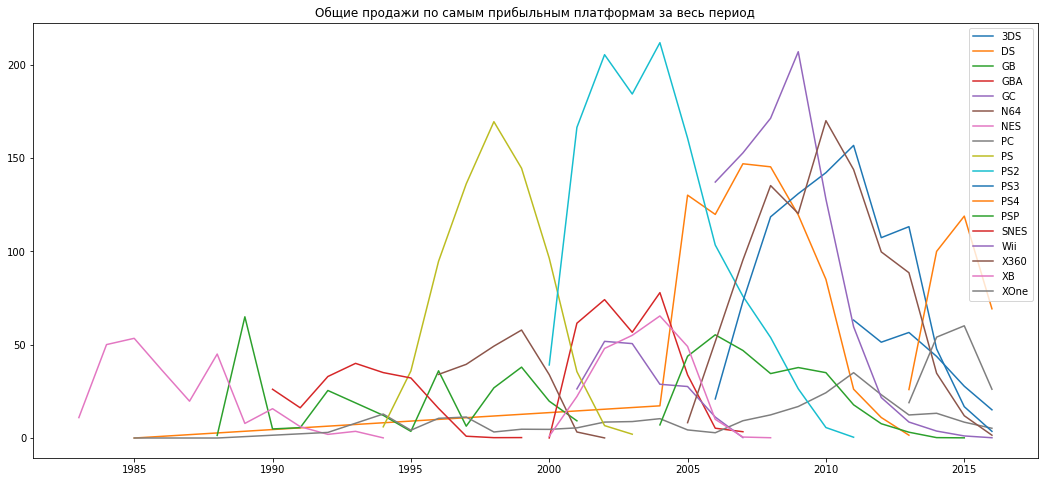

In [20]:
plt.rcParams['figure.figsize'] = [18,8]
for name in top_platforms_by_sales_data['platform'].unique():
    x = top_platforms_by_sales_data.query('platform == @name')['year_of_release']
    y = top_platforms_by_sales_data.query('platform == @name')['total_sales']
    plt.plot(x,y,label = name )
    plt.legend(loc = 'upper right')
    plt.title('Общие продажи по самым прибыльным платформам за весь период')

Попробуем так же расчитать среднюю "продолжительность жизни" одной платформы на основании наших данных.

In [21]:
average_duration_of_existence = (top_platforms_by_sales_data.
                                 pivot_table(index = 'platform',values = 'year_of_release', aggfunc='count')
                                )
average_duration_of_existence

,year_of_release
platform,
3DS,6
DS,11
GB,13
GBA,8
GC,7
N64,7
NES,12
PC,26
PS,10


In [22]:
average_duration_of_existence['year_of_release'].mean()

10.277777777777779

На данном этапе средняя 'продолжительность жизни' среди наших топ платформ составляет в среднем 10 лет.Но все ли так однозначно?

Рассмотрим такой вопрос:
Как часто выходили новые платформы?

Разделим наш общий временной период на периоды по-меньше, длинной в 10 лет.

In [23]:
top_platforms_by_sales_data_1980_1989 = (top_platforms_by_sales_data.query('year_of_release < 1990')
                                        .pivot_table(index = 'platform',values = 'year_of_release', aggfunc='count')
                                        )
top_platforms_by_sales_data_1980_1989 = top_platforms_by_sales_data_1980_1989.reset_index()
top_platforms_by_sales_data_1980_1989


,platform,year_of_release
0,DS,1
1,GB,2
2,NES,7
3,PC,2


За 80-ые годы появилось 4 платформы

In [24]:
top_platforms_by_sales_data_1990_1999 = (top_platforms_by_sales_data.query('year_of_release < 2000')
                                        .pivot_table(index = 'platform',values = 'year_of_release', aggfunc='count')
                                        )
top_platforms_by_sales_data_1990_1999 = top_platforms_by_sales_data_1990_1999.reset_index()
top_platforms_by_sales_data_1990_1999

,platform,year_of_release
0,DS,1
1,GB,11
2,N64,4
3,NES,12
4,PC,9
5,PS,6
6,SNES,10


За 90-ые годы платформ стало уже 7

In [25]:
top_platforms_by_sales_data_2000_2010 = (top_platforms_by_sales_data.query('year_of_release < 2010')
                                        .pivot_table(index = 'platform',values = 'year_of_release', aggfunc='count')
                                        )
top_platforms_by_sales_data_2000_2010 = top_platforms_by_sales_data_2000_2010.reset_index()
top_platforms_by_sales_data_2000_2010

,platform,year_of_release
0,DS,7
1,GB,13
2,GBA,8
3,GC,7
4,N64,7
5,NES,12
6,PC,19
7,PS,10
8,PS2,10
9,PS3,4


За период с 2000 по 2010 год платформ стало уже 14

In [26]:
top_platforms_by_sales_data_2010_2016 = (top_platforms_by_sales_data.query('year_of_release <= 2016')
                                        .pivot_table(index = 'platform',values = 'year_of_release', aggfunc='count')
                                        )
top_platforms_by_sales_data_2010_2016 = top_platforms_by_sales_data_2010_2016.reset_index()
top_platforms_by_sales_data_2010_2016

,platform,year_of_release
0,3DS,6
1,DS,11
2,GB,13
3,GBA,8
4,GC,7
5,N64,7
6,NES,12
7,PC,26
8,PS,10
9,PS2,12


За не полный период с 2010 по 2016 год появилось еще 3 платформы.И это еще период указан не полностью.И мы брали данные только по топ платформам. 

#### Вывод

Опираясь на вычисления мы можем сказать что средний период жизни одной платформы равен 10 годам.Но учитывая с какой скоростью появляются новые платформы(почти в двое увеличивается их количество), как быстро выросла общая выручка в 2000-х годах,а так же как быстро совершенствуются технологии.Можно с увереностью на данном этапе сократить среднюю "продолжительность жизни" одной платформы до 5 лет.

### 3) Исследовательский анализ - построение графиков, диаграмм рассеяния, нахождение зависимостей.

Создадим таблицу с данным только за период 2011 - 2016 гг.

In [27]:
actual_data = df_games.query('year_of_release >= 2011')

In [28]:
actual_data_total_sales  = actual_data.pivot_table(index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')
actual_data_total_sales = actual_data_total_sales.reset_index()
actual_data_total_sales.sort_values( by = 'total_sales', ascending = False)


,platform,year_of_release,total_sales
16,PS3,2011,156.78
48,X360,2011,143.84
24,PS4,2015,118.90
18,PS3,2013,113.25
17,PS3,2012,107.36
23,PS4,2014,100.00
49,X360,2012,99.74
50,X360,2013,88.58
25,PS4,2016,69.25
0,3DS,2011,63.20


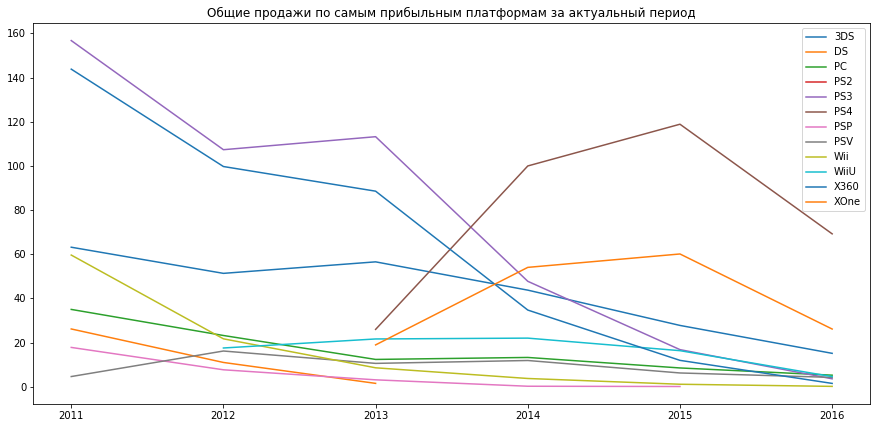

In [29]:
plt.rcParams['figure.figsize'] = [15,7]
for name in actual_data_total_sales['platform'].unique():
    x = actual_data_total_sales.query('platform == @name')['year_of_release']
    y = actual_data_total_sales.query('platform == @name')['total_sales']
    plt.plot(x,y,label = name )
    plt.legend(loc = 'upper right')
    plt.title('Общие продажи по самым прибыльным платформам за актуальный период')

In [30]:
top_platforms_2011_2016 = actual_data.pivot_table(index = 'platform', values = ['total_sales','year_of_release'], aggfunc = {'total_sales':['sum']})
top_platforms_2011_2016 = top_platforms_2011_2016.reset_index()
top_platforms_2011_2016.columns = ['platform','total_sales']
top_platforms_2011_2016.sort_values( by = 'total_sales', ascending = False)

,platform,total_sales
4,PS3,445.57
10,X360,380.38
5,PS4,314.14
0,3DS,257.81
11,XOne,159.32
2,PC,97.68
8,Wii,95.02
9,WiiU,82.19
7,PSV,53.81
1,DS,38.73


#### Вывод:
Судя по графику к перспективным платформа на 2017 год можно отнести PS4 и XOne.Конечно можно отметить то что лидерами по общим продажам являются PS3 и X360.Но их актульность под вопросом, так как период существования больше 5 лет.По этой же причине мы не относим к числу перспективных платформу 3DS 	

Сгрупируем наши данные по глобальным продажам каждой игры и разбивкой по платформам

In [31]:
groupby_by_platform = actual_data.pivot_table(index ='name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
groupby_by_platform = groupby_by_platform.reset_index() 
groupby_by_platform

platform,name,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,Beyblade Burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fire Emblem Fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Frozen: Olaf's Quest,0.59,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Haikyu!! Cross Team Match!,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tales of Xillia 2,NaN,NaN,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,htoL#NiQ: The Firefly Diary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN
2414,inFAMOUS 2,NaN,NaN,NaN,NaN,1.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2415,inFAMOUS: Second Son,NaN,NaN,NaN,NaN,NaN,2.79,NaN,NaN,NaN,NaN,NaN,NaN
2416,thinkSMART: Chess for Kids,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проанализируем диаграмму размаха построенную по глобальным продажам каждой игры и разбивкой по платформам.

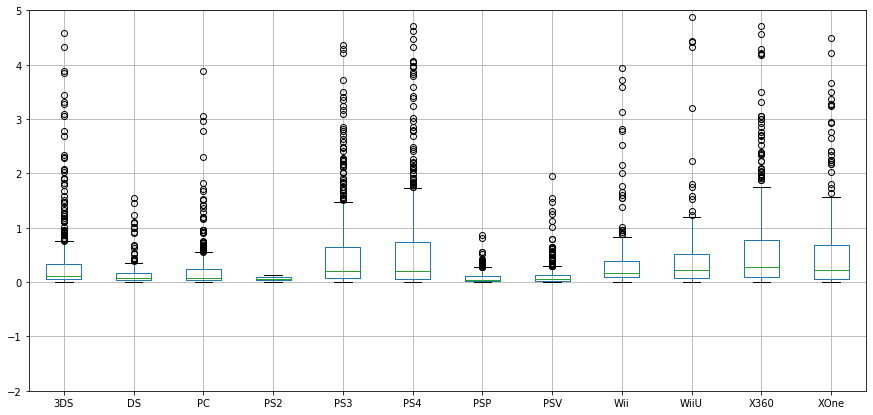

In [32]:
groupby_by_platform.boxplot()
plt.ylim(-2,5);

#### Вывод

Проанализировав диаграмму размаха выше (построенна по глобальным продажам каждой игры и разбивкой по платформам) можно сделать следующие выводы:
- 1) Выделяются 6 платформ с наибольшими диграммами размаха, со смещением вверх (3DS,PS3,PS4,Wii,WiiU,X360,ХOne).Это говорит нам о более высоком потолке цен игр на этих платформах.Скорее всего это связанно с тем что платформы представленны во всех целевых регионах, а значит и разброс цен тоже большой(финансовые возможности и интерес в каждом регионе разный). 
- 2) Так же можно с уверенностью сказать что по количеству выбросов лидируют эти же 6 платформ (3DS,PS3,PS4,Wii,WiiU,X360,ХOne).
Смею предположить что связано это с высоким качеством игр и их высоким спросом на этих платформах, что в свою очередь может иногда необаснованно поднимать цены выше верхнего уровня цен на диаграмме размаха.
- 3) В 4-ку с наибольшими средними значениями по общим продажам входят такие платформы как PS3,PS4,X360,ХOne.Что так же нам говорит о высоком качестве и высоком спросе игр на этих платформах. 

Проанализируем зависимость общих продаж от оценки критиков и оценки пользователей.На примере одной из популярных платформ.За основу возьмем данные по платформе PS4.

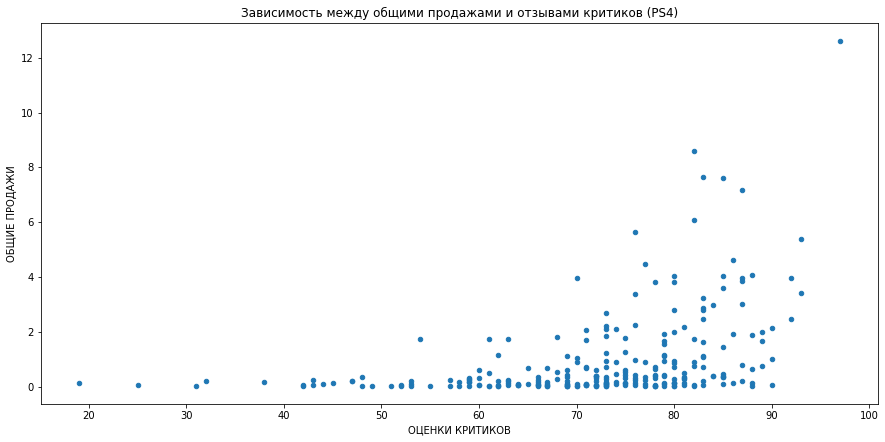

In [33]:
ps4_data_dependence_on_critic_score = actual_data.query('platform == "PS4" and critic_score != "nan"')
ps4_data_dependence_on_critic_score.plot(x='critic_score', y = 'total_sales', kind = 'scatter')
plt.ylabel('ОБЩИЕ ПРОДАЖИ')
plt.xlabel('ОЦЕНКИ КРИТИКОВ')
plt.title('Зависимость между общими продажами и отзывами критиков (PS4)');

In [34]:
print(ps4_data_dependence_on_critic_score['total_sales'].corr(ps4_data_dependence_on_critic_score['critic_score']))

0.406567902061781


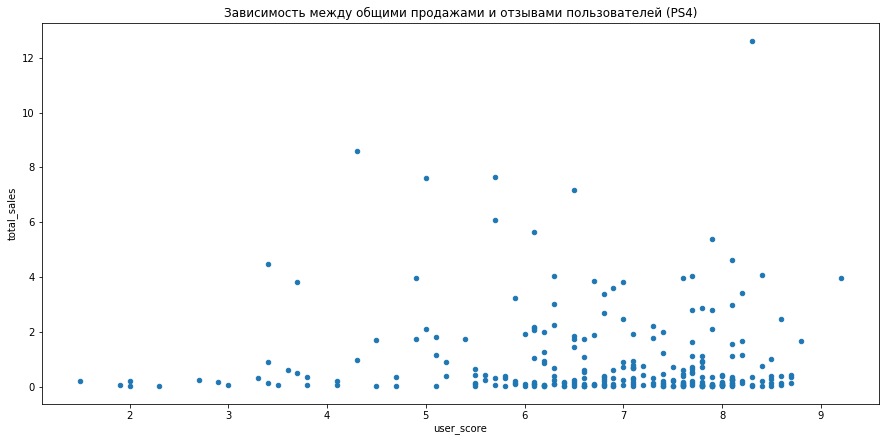

In [35]:
ps4_data_dependence_on_user_score = actual_data.query('platform == "PS4" and user_score != -1')
ps4_data_dependence_on_user_score.dropna(subset = ['user_score'],inplace = True)
ps4_data_dependence_on_user_score['user_score'] = ps4_data_dependence_on_user_score['user_score'].astype(float)
ps4_data_dependence_on_user_score.plot(x='user_score', y = 'total_sales', kind = 'scatter')
plt.title('Зависимость между общими продажами и отзывами пользователей (PS4)');   

In [36]:
print(ps4_data_dependence_on_user_score['total_sales'].corr(ps4_data_dependence_on_user_score['user_score']))

-0.031957110204556424


#### Вывод:
Как мы видим по нашим расчетам, есть прямая зависимость между оценкой критиков и общими продажами, и отсутствует зависимость между оценкой пользователей и общими продажами.
Я думаю это связанно с тем, что оценки критиков можно назвать более "профессиональными" и охватывающими все аспекты игры, нежели отзывы пользователей. Также может быть связано с тем, что оценки критиков выходят до релиза. Соответсвенно, частично опираясь на них, люди и покупают игры. Пользователи выставляют оценки по прошествии какого-то времени, поэтому они уже меньше влияют на продажи.

Рассмотрим эти же зависимости на нескольких других платформах.

### XOne

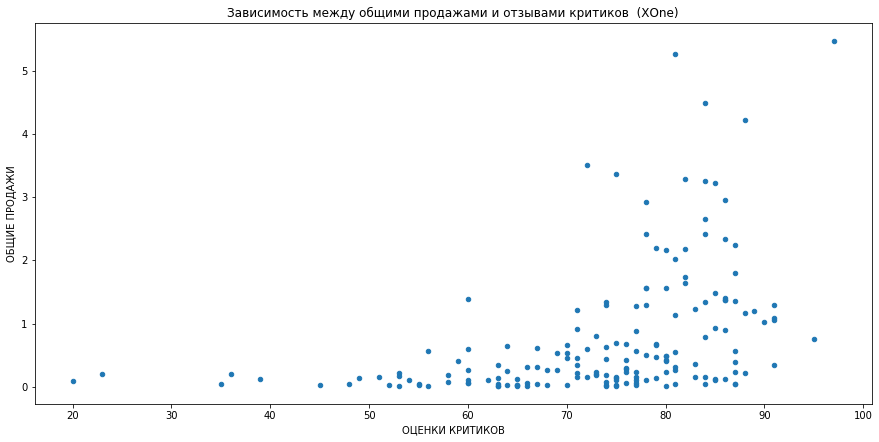

In [37]:
xone_data_dependence_on_critic_score = actual_data.query('platform == "XOne" and critic_score != "nan"')
xone_data_dependence_on_critic_score.plot(x='critic_score', y = 'total_sales', kind = 'scatter')
plt.ylabel('ОБЩИЕ ПРОДАЖИ')
plt.xlabel('ОЦЕНКИ КРИТИКОВ')
plt.title('Зависимость между общими продажами и отзывами критиков  (XOne)');

In [38]:
print(xone_data_dependence_on_critic_score['total_sales'].corr(xone_data_dependence_on_critic_score['critic_score']))

0.41699832800840175


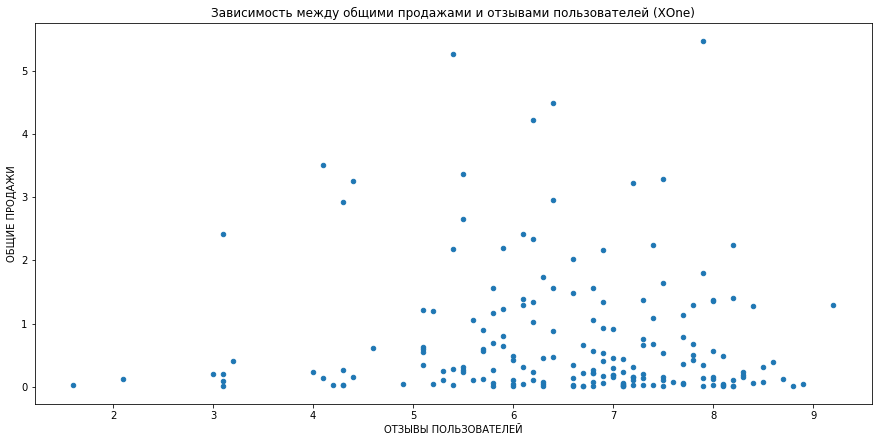

In [39]:
xone_data_dependence_on_user_score = actual_data.query('platform == "XOne" and user_score != -1')
xone_data_dependence_on_user_score.dropna(subset = ['user_score'],inplace = True)
xone_data_dependence_on_user_score['user_score'] = xone_data_dependence_on_user_score['user_score'].astype(float)
xone_data_dependence_on_user_score.plot(x='user_score', y = 'total_sales', kind = 'scatter')
plt.ylabel('ОБЩИЕ ПРОДАЖИ')
plt.xlabel('ОТЗЫВЫ ПОЛЬЗОВАТЕЛЕЙ')
plt.title('Зависимость между общими продажами и отзывами пользователей (XOne)');

In [40]:
print(xone_data_dependence_on_user_score['total_sales'].corr(xone_data_dependence_on_user_score['user_score']))

-0.06892505328279412


### WiiU

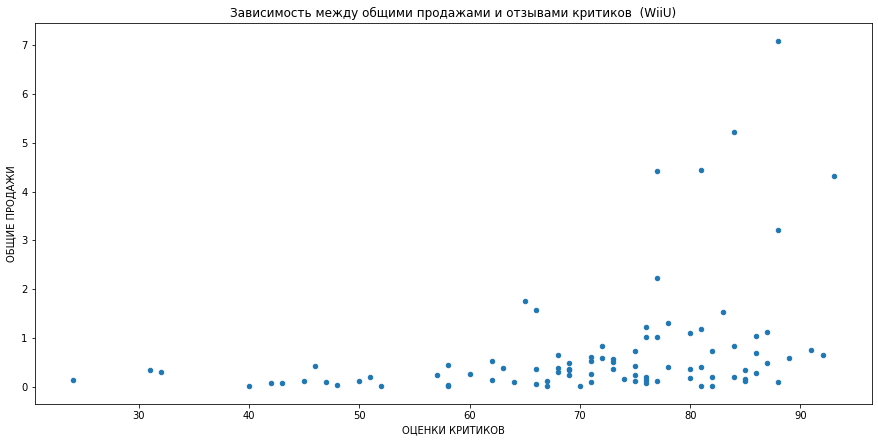

In [41]:
wiiu_data_dependence_on_critic_score = actual_data.query('platform == "WiiU" and critic_score != "nan"')
wiiu_data_dependence_on_critic_score.plot(x='critic_score', y = 'total_sales', kind = 'scatter')
plt.ylabel('ОБЩИЕ ПРОДАЖИ')
plt.xlabel('ОЦЕНКИ КРИТИКОВ')
plt.title('Зависимость между общими продажами и отзывами критиков  (WiiU)');

In [42]:
print(wiiu_data_dependence_on_critic_score['total_sales'].corr(wiiu_data_dependence_on_critic_score['critic_score']))

0.3483797601201749


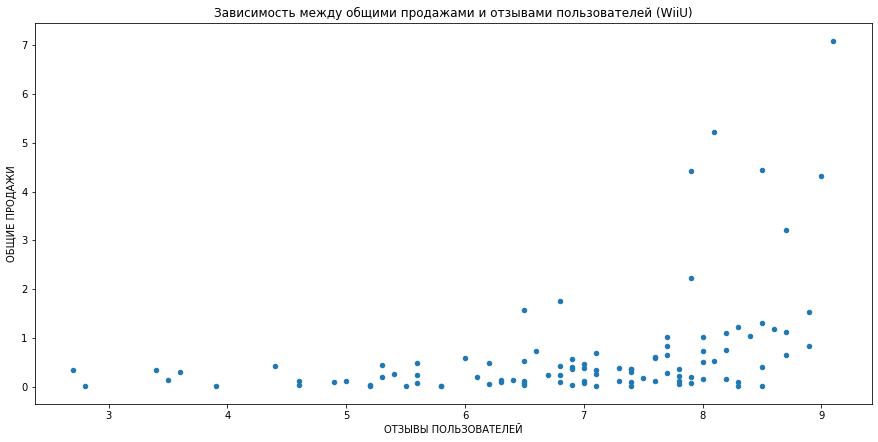

In [43]:
wiiu_data_dependence_on_user_score = actual_data.query('platform == "WiiU" and user_score != -1')
wiiu_data_dependence_on_user_score.dropna(subset = ['user_score'],inplace = True)
wiiu_data_dependence_on_user_score['user_score'] = wiiu_data_dependence_on_user_score['user_score'].astype(float)
wiiu_data_dependence_on_user_score.plot(x='user_score', y = 'total_sales', kind = 'scatter')
plt.ylabel('ОБЩИЕ ПРОДАЖИ')
plt.xlabel('ОТЗЫВЫ ПОЛЬЗОВАТЕЛЕЙ')
plt.title('Зависимость между общими продажами и отзывами пользователей (WiiU)');   

In [44]:
print(wiiu_data_dependence_on_user_score['total_sales'].corr(wiiu_data_dependence_on_user_score['user_score']))

0.4002190202148617


### 3DS

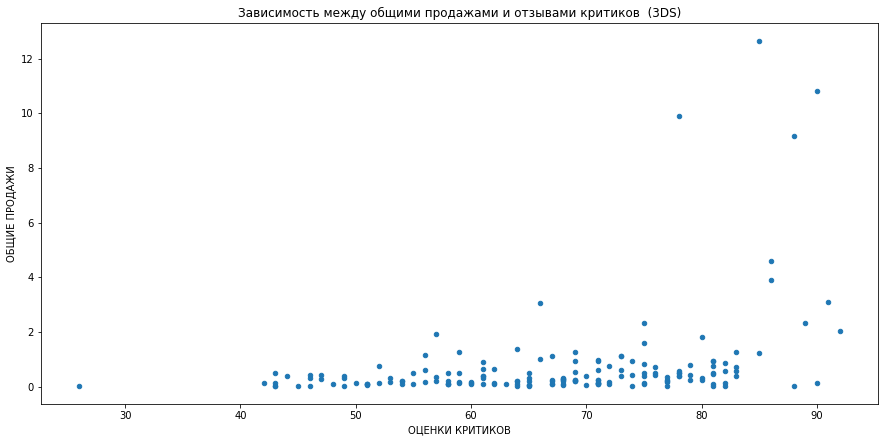

In [45]:
ds3_data_dependence_on_critic_score = actual_data.query('platform == "3DS" and critic_score != "nan"')
ds3_data_dependence_on_critic_score.plot(x='critic_score', y = 'total_sales', kind = 'scatter')
plt.ylabel('ОБЩИЕ ПРОДАЖИ')
plt.xlabel('ОЦЕНКИ КРИТИКОВ')
plt.title('Зависимость между общими продажами и отзывами критиков  (3DS)');

In [46]:
print(ds3_data_dependence_on_critic_score['total_sales'].corr(ds3_data_dependence_on_critic_score['critic_score']))

0.34873973059848346


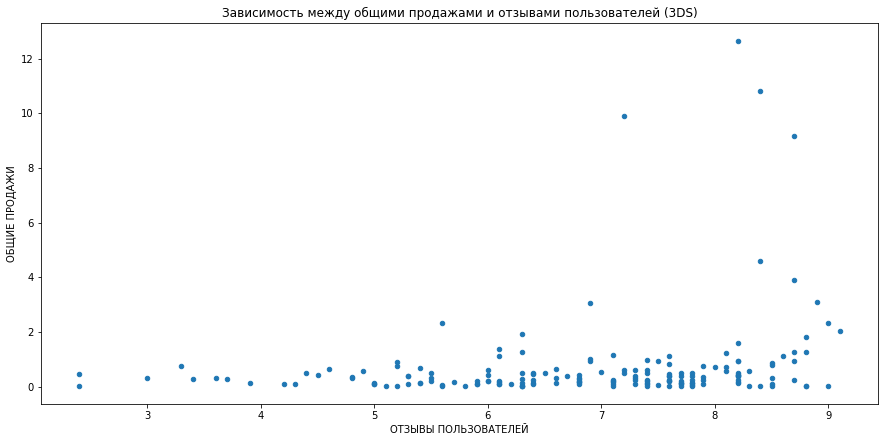

In [47]:
ds3_data_dependence_on_user_score = actual_data.query('platform == "3DS" and user_score != -1')
ds3_data_dependence_on_user_score.dropna(subset = ['user_score'],inplace = True)
ds3_data_dependence_on_user_score['user_score'] = ds3_data_dependence_on_user_score['user_score'].astype(float)
ds3_data_dependence_on_user_score.plot(x='user_score', y = 'total_sales', kind = 'scatter')
plt.ylabel('ОБЩИЕ ПРОДАЖИ')
plt.xlabel('ОТЗЫВЫ ПОЛЬЗОВАТЕЛЕЙ')
plt.title('Зависимость между общими продажами и отзывами пользователей (3DS)');   

In [48]:
print(ds3_data_dependence_on_user_score['total_sales'].corr(ds3_data_dependence_on_user_score['user_score']))

0.22207843643390884


#### Вывод:
- Результаты вычислений по зависимостям общей выручки от оценок критиков и пользователей для игр на других платформах разнятся c результатами платформы PS4.
- Мы брали за основу данные по XOne, WiiU, 3DS.Зависимости платформы XOne cхожи с зависимостями платформы PS4.
- А вот в зависимостях по платформам WiiU и 3DS есть небольшие отличия от платформы PS4.Между оценкой пользователей и общей выручкой на эти платформах (WiiU и 3DS) есть небольшая прямая зависимость, в отличии от  платформы PS4

Посмотрим на общее рапределение игр по жанрам.

In [49]:
groupby_by_genre = actual_data.pivot_table(index ='name', columns = 'genre', values = 'total_sales', aggfunc = 'sum')
groupby_by_genre = groupby_by_genre.reset_index() 
groupby_by_genre

genre,name,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Beyblade Burst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1,Fire Emblem Fates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.67,NaN,NaN,NaN,NaN
2,Frozen: Olaf's Quest,NaN,NaN,NaN,NaN,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Haikyu!! Cross Team Match!,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tales of Xillia 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,htoL#NiQ: The Firefly Diary,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2414,inFAMOUS 2,1.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2415,inFAMOUS: Second Son,2.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2416,thinkSMART: Chess for Kids,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


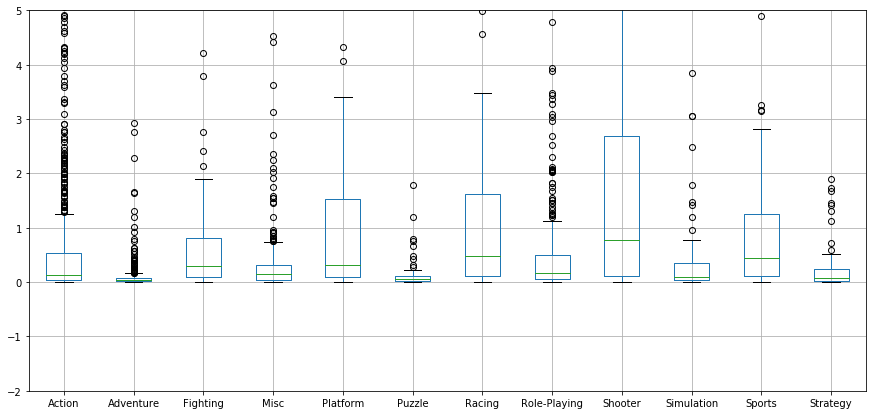

In [50]:
groupby_by_genre.boxplot()
plt.ylim(-2,5);

#### Вывод:
К самым прибыльным жанрам можно отнести Shooter, Platform, Racing, Sport, Fighting, Action.А вот к жанрам с самыми маленькими продажа можно отнести Adventure, Puzzle. Конечно это связано с популярностью жанров (Shooter, Platform, Racing, Sport, Fighting, Action), но так же не стоит забывать, что производство игр в жанрах например Action или Shooter обходится намного дороже, чем производство Puzzle-игр.  
Хотелось бы отметить что в жанрах Action,Adventure,Role_Playing самое большое количетсво выбросов.

Составим портрет пользователя каждого региона (NA - Северная Америка, EU - Европа, JP - Япония).

In [51]:
noth_america = actual_data.pivot_table(index = ['na_sales','genre','platform','rating'], values = 'critic_score')
noth_america = noth_america.reset_index()  
noth_america

,na_sales,genre,platform,rating,critic_score
0,0.00,Action,3DS,E,47.0
1,0.00,Action,3DS,E10+,61.5
2,0.00,Action,3DS,M,46.0
3,0.00,Action,3DS,T,67.0
4,0.00,Action,PC,E,73.0
...,...,...,...,...,...
1426,6.73,Shooter,X360,M,73.0
1427,7.02,Action,PS3,M,97.0
1428,8.25,Shooter,X360,M,83.0
1429,9.04,Shooter,X360,M,88.0


In [52]:
noth_america_platforms_sales = noth_america.pivot_table(index ='platform',values ='na_sales',aggfunc = 'sum')
noth_america_platforms_sales = noth_america_platforms_sales.reset_index()
noth_america_platforms_sales.sort_values(by = 'na_sales',ascending = False)

,platform,na_sales
9,X360,181.01
3,PS3,128.58
4,PS4,79.88
10,XOne,74.98
0,3DS,48.58
8,WiiU,29.60
7,Wii,25.30
2,PC,24.16
6,PSV,9.45
1,DS,5.34


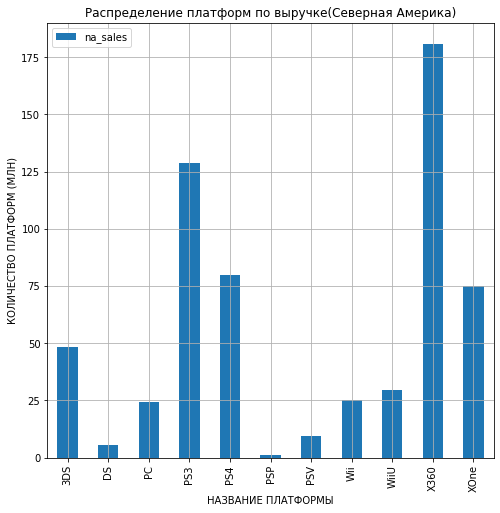

In [53]:
noth_america_platforms_sales.plot(x ='platform',y ='na_sales', kind = 'bar', figsize = (8,8), grid = True)
plt.ylabel('КОЛИЧЕСТВО ПЛАТФОРМ (МЛН)')
plt.xlabel('НАЗВАНИЕ ПЛАТФОРМЫ')
plt.title('Распределение платформ по выручке(Северная Америка)');

In [54]:
noth_america['genre'].value_counts()

Action          436
Shooter         199
Role-Playing    154
Sports          154
Misc             91
Fighting         84
Racing           82
Platform         79
Adventure        61
Simulation       40
Strategy         36
Puzzle           15
Name: genre, dtype: int64

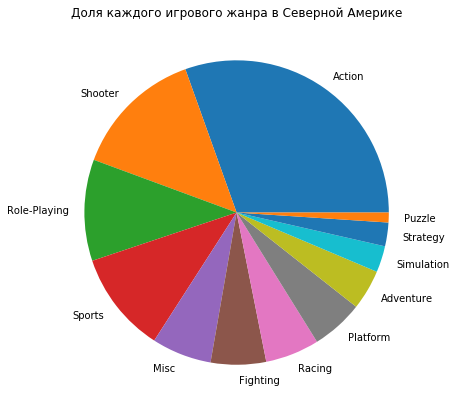

In [55]:
noth_america['genre'].value_counts().plot(kind = 'pie')
plt.ylabel('')
plt.title('Доля каждого игрового жанра в Северной Америке');

#### Вывод:
Пользователи в Северной Америке чаще предпочитают такие платформы как PS3 и Х360.Но им 'наступают на пятки' платформы PS4 и XOne.Платформы этих же линеек, но более нового поколения.
Если говорить про жанры то пользователи в Северной Америке больше предпочитают играть в игры таких жанров как Action,Shooter,Sports,Role-Playin.

In [56]:
europe = actual_data.pivot_table(index = ['eu_sales','genre','platform','rating'], values = 'critic_score')
europe = europe.reset_index()  
europe

,eu_sales,genre,platform,rating,critic_score
0,0.00,Action,3DS,E,46.0
1,0.00,Action,3DS,E10+,61.0
2,0.00,Action,3DS,M,46.0
3,0.00,Action,3DS,T,65.0
4,0.00,Action,PC,E,73.0
...,...,...,...,...,...
1394,5.73,Shooter,PS3,M,85.5
1395,5.75,Sports,PS4,E,85.0
1396,6.12,Sports,PS4,E,82.0
1397,6.31,Action,PS4,M,97.0


In [57]:
europe_platforms_sales = europe.pivot_table(index ='platform',values ='eu_sales',aggfunc = 'sum')
europe_platforms_sales = europe_platforms_sales.reset_index()
europe_platforms_sales.sort_values(by = 'eu_sales',ascending = False)

,platform,eu_sales
3,PS3,114.99
4,PS4,110.42
9,X360,83.96
2,PC,43.37
10,XOne,40.55
0,3DS,32.32
8,WiiU,19.96
7,Wii,15.12
6,PSV,8.12
1,DS,1.97


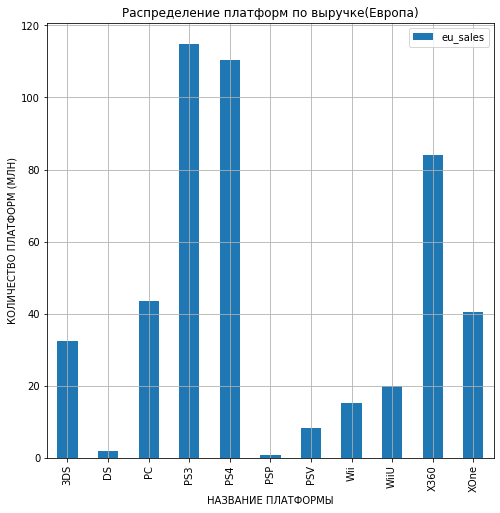

In [58]:
europe_platforms_sales.plot(x ='platform',y ='eu_sales', kind = 'bar', figsize = (8,8),grid = True)
plt.ylabel('КОЛИЧЕСТВО ПЛАТФОРМ (МЛН)')
plt.xlabel('НАЗВАНИЕ ПЛАТФОРМЫ')
plt.title ('Распределение платформ по выручке(Европа)');

In [59]:
europe['genre'].value_counts()

Action          416
Shooter         201
Sports          145
Role-Playing    138
Racing           93
Misc             85
Fighting         80
Platform         79
Adventure        61
Simulation       47
Strategy         41
Puzzle           13
Name: genre, dtype: int64

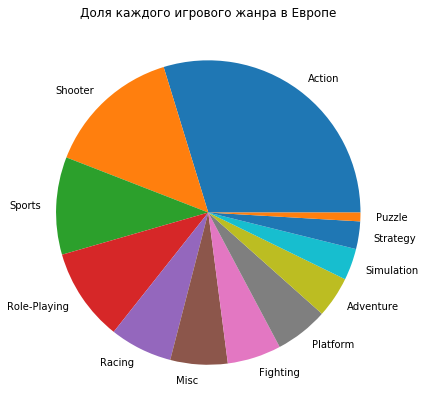

In [60]:
europe['genre'].value_counts().plot(kind = 'pie')
plt.ylabel('')
plt.title('Доля каждого игрового жанра в Европе');

#### Вывод:
Пользователи в Европе так же как и в Северной Америке чаще предпочитают такие платформы как PS3 и Х360.И от них так же недалеко расположились платформы PS4 и XOne.Но стоит отметить что общие продажи в Северной Америке больше чем в Европе.
Если говорить про жанры то пользователи в Европе так же больше предпочитают жанры Action,Shooter,Sports,Role-Playin.

In [61]:
japan = actual_data.pivot_table(index = ['jp_sales','genre','platform','rating'], values = 'critic_score')
japan = japan.reset_index()  
japan

,jp_sales,genre,platform,rating,critic_score
0,0.00,Action,3DS,E,54.333333
1,0.00,Action,3DS,E10+,59.875000
2,0.00,Action,3DS,T,56.000000
3,0.00,Action,DS,E,56.000000
4,0.00,Action,DS,E10+,54.200000
...,...,...,...,...,...
752,2.14,Platform,3DS,E,90.000000
753,2.47,Platform,3DS,E,78.000000
754,2.62,Role-Playing,3DS,T,86.000000
755,2.69,Racing,3DS,E,85.000000


In [62]:
japan_platforms_sales =japan.pivot_table(index ='platform',values ='jp_sales',aggfunc = 'sum')
japan_platforms_sales = japan_platforms_sales.reset_index()
japan_platforms_sales.sort_values(by = 'jp_sales',ascending = False)

,platform,jp_sales
0,3DS,33.13
3,PS3,25.39
8,WiiU,10.04
4,PS4,7.37
6,PSV,6.77
7,Wii,3.75
5,PSP,1.66
9,X360,1.54
1,DS,0.90
10,XOne,0.23


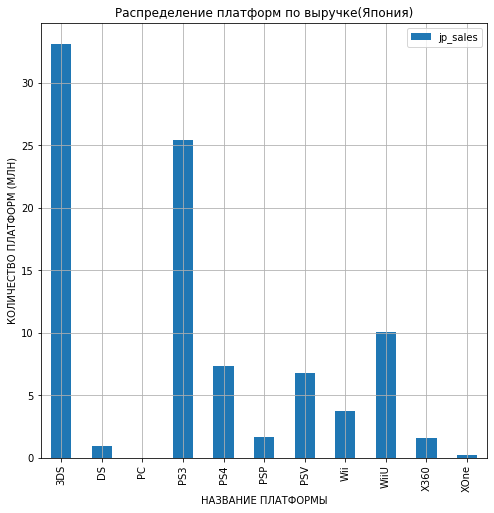

In [63]:
japan_platforms_sales.plot(x ='platform',y ='jp_sales', kind = 'bar', figsize = (8,8),grid = True)
plt.ylabel('КОЛИЧЕСТВО ПЛАТФОРМ (МЛН)')
plt.xlabel('НАЗВАНИЕ ПЛАТФОРМЫ')
plt.title ('Распределение платформ по выручке(Япония)');

In [64]:
japan['genre'].value_counts()

Action          183
Role-Playing    117
Shooter          79
Fighting         65
Misc             52
Platform         51
Adventure        50
Sports           50
Racing           48
Simulation       29
Strategy         21
Puzzle           12
Name: genre, dtype: int64

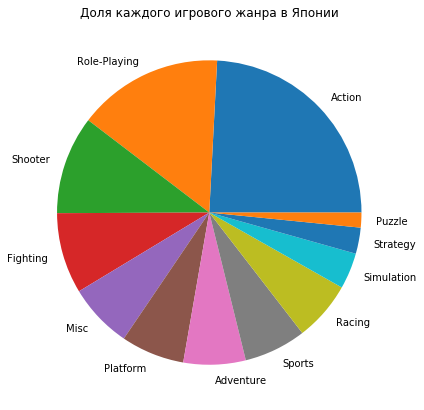

In [65]:
japan['genre'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.title('Доля каждого игрового жанра в Японии');

#### Вывод:
Что же касается пользователей в Японий, то в 4-ку наиболее предпочтительных игровых платформ среди пользователей входят 3DS,PS3,WiiU,PS4.И кстати хочется отметить что в Японии вообще не любят играть в копьютерные игры на PC.По жанрам так же присутствуют отличия от других регионов.Наиболее популярными среди пользователей в Японии являются жанры  Action,Role-Playing,Shooter,Fighting.


Выявим лидера по общим продажам среди регионов.

In [66]:
noth_america['na_sales'].sum()

608.02

In [67]:
europe['eu_sales'].sum()

471.54

In [68]:
japan['jp_sales'].sum()

90.78

#### Вывод:
Как мы видим лидером по общим продажам среди регионов является Северная Америка.

Определим влияние рейтинга ESRB на продажи в отдельном регионе.

In [69]:
raiting_data = actual_data.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
raiting_data = raiting_data.reset_index()  

In [70]:
raiting_data

,rating,eu_sales,jp_sales,na_sales
0,E,141.73,36.68,170.17
1,E10+,78.00,11.23,117.72
2,EC,0.00,0.00,0.42
3,M,250.26,26.14,308.45
4,RP,0.03,0.00,0.00
5,T,83.16,33.39,109.31


В нашем списке рейтингов представленны следующие категории:
- E - игры рассчитаны на любую возрастную категорию, но больше всего они привлекут интерес детей от 6 лет. 
- E10 + - игры для всех, кому исполнилось 10. Игры с такой маркировкой отображают минимум крови.
- EC - игры предназначены специально для детей младшего возраста (от 3 лет). Это развивающие игры(приложения), выполненные в ярком мультипликационном стиле.
- M - игры рассчитаны на взрослых и подростков старше 17. Игры с такой маркировкой запрещены для использования детьми младшего возраста, так как содержат довольно много непристойных и жестоких эпизодов с кровью, убийствами и действиями сексуального характера.
- RP - эта маркировка значит, что игры(приложения) ожидают решения от ESRB и на данный момент не имеют рейтинга.
- T - Игры подходят для подростков старше 13-ти лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

#### Вывод:
- Как мы видим из наших данных есть определенная зависимость между рейтингом, и выручкой по регионам.
- Наибольшей популярностью (причем во всем трех регионах) пользуются рейтинги M,E,T - рейтинги охватывающие в основном взрослую категорию населения и подростков наших регионов.Это связанно скорее всего с тем что растет сфера компьютерных игры, возросло качество игры (графика, динамичность, интеллектульная состовляющая, реалистичность), а это в свою очередь повышает интерес со стороны взрослой категорий покупателей.
- Как и ожидалось наименьшей популярностью пользуются игры для совсем маленьких - EC и EC+.
- Отдельно хочется отметить категорию RP.Можно предположить что это игры(приложения) с очень специфической темой игры.И рейтинг определить для них тяжело. 

### 4) Проверка гипотез.

##### Гипотеза №1
Проверим равенство средних пользовательских рейтингов платформ XOne и PC

- Гипотеза H₀:
Средние пользовательские рейтинги платформ XOne и PC равны
- Гипотеза H₁:
Средние пользовательские рейтинги платформ XOne и PC не равны

In [71]:
platform_xone = actual_data.query('platform == "XOne" and user_score != "tbd=Nan"')
platform_xone.dropna(subset = ['user_score'],inplace = True)
platform_xone['user_score'] = platform_xone['user_score'].astype(float)
user_score_platform_xone_list = list(platform_xone['user_score'])

platform_pc = actual_data.query('platform == "PC" and user_score != "tbd=Nan"')
platform_pc.dropna(subset = ['user_score'],inplace = True)
platform_pc['user_score'] = platform_pc['user_score'].astype(float)
user_score_platform_pc_list = list(platform_pc['user_score'])



In [72]:
alpha = 0.05
results =st.ttest_ind(user_score_platform_xone_list,user_score_platform_pc_list,equal_var = False)

print('p-значение:',results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.792726861162059
Не получилось отвергнуть нулевую гипотезу


In [73]:
np_mean_xone = np.mean(user_score_platform_xone_list)
np_mean_xone

6.092746113989638

In [74]:
np_mean_pc = np.mean(user_score_platform_pc_list)
np_mean_pc

6.039076923076923

#### Вывод:
В результате наших вычислений отвергнуть нулевую гипотезу не получилось.Средние пользовательские рейтинги платформ XOne и PC равны.

##### Гипотеза №2
Проверим равенство средних пользовательских рейтингов жанров Action и Sports.

- Гипотеза H₀:
Средние пользовательские рейтинги жанров Action и Sports равны.
- Гипотеза H₁:
Средние пользовательские рейтинги жанров Action и Sports не равны.

In [75]:
genre_action = actual_data.query('genre == "Action" and user_score != "tbd=Nan"')
genre_action.dropna(subset = ['user_score'],inplace = True)
genre_action['user_score'] = genre_action['user_score'].astype(float)
genre_action_user_score_list = list(genre_action['user_score'])

genre_sports = actual_data.query('genre == "Sports" and user_score != "tbd=Nan"')
genre_sports.dropna(subset = ['user_score'],inplace = True)
genre_sports['user_score'] = genre_sports['user_score'].astype(float)
genre_sports_user_score_list = list(genre_sports['user_score'])


In [76]:
alpha = 0.05
results =st.ttest_ind(genre_action_user_score_list,genre_sports_user_score_list,equal_var = False)

print('p-значение:',results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.718088834472571e-12
Отвергаем нулевую гипотезу


In [77]:
np_mean_action = np.mean(genre_action_user_score_list)
np_mean_action

5.930469798657719

In [78]:
np_mean_sports = np.mean(genre_sports_user_score_list)
np_mean_sports

4.546101694915254

#### Вывод:
В результате наших вычислений нулевая гипотеза была отвергнута.Средние пользовательские рейтинги жанров Action и Sports не равны.

### 5) Общий вывод.

Для того чтобы ответить на главный вопрос (выбрать потенциально перспективный продукт, а так же путь в котором следует  планировать наши рекламные акции), мы попытались для начала определить актульный период существования одной платформы.В дальнейшем мы выбрали актуальный временной отрезок, данные которого, лучше нам помогли понять перспективы на следующий год.
Так же мы отобрали наиболее популярные платформы, жанры и рейтинги.Помимо всего прочего мы описали портрет пользователя для каждого региона, чтобы лучше понимать его потребности.Выявили лидера по продажам среди регионов.
И так: проведя анализ продаж компьтерных игр в разных регионах за предыдущие годы, я пришел к следующим выводам:
- 1) Средняя 'продолжительность жизни' игровой платформы составляет 5 лет.
- 2) Лидером среди регионов по большему количеству продаж является Северная Америка(608.02 млн).
- 3) К перспективным платформам на 2017 год можно отнести PS4 и XOne.Так же не стоит забывать и о их предыдущих версиях PS3 и X360.Не уделив нужного внимания этим платформам, мы можем потерять сущетственную долю пользователей.
- 4) Стоит увеличить количество и ассортимент игр таких жанров как Action,Shooter,Sports,Role-Playing.Эти жанры являются лидерами продаж в целевых регионах.
- 5) Еще хотелось бы отмети необходимость охвата нашим магазином платформ 3DS и WiiU, и жанра Fighting.Эти платформы и жанр пользуются хорошим спросом среди пользователей Японии, где находится существенная доля общих мировых продаж компьтерных игр.
- 6) Стоит так же увеличить игры с рейтингом M,E,T, которые являются лидерами продаж во всех трех регионах. 
- 7) При принятии решения касательно ассортимента нашего магазина, стоит обратить внимание в большей степени на отзывы критиков, и в меньшей степени на отзывы пользователей.Это связано с тем, что отзывы критиков можно назвать более надежными и профессиональными
